This notebook preprocesses and analysis google mobility Data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install matplotlib==3.5

In [ ]:
# Import libraries
import folium
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
from functools import reduce 

In [ ]:
root_dir = '/content/drive/MyDrive/Environmental_covid 19/' # Location where my file directory are located

air_passsenger = pd.read_csv(os.path.join(root_dir, 'Air_Transport/Quarterly_Air_Passenger_20192021.csv'))
mobility_2020 = pd.read_csv(os.path.join(root_dir, 'Nigeria Google Mobility Data/2020_NG_Region_Mobility_Report.csv'))
mobility_2021 = pd.read_csv(os.path.join(root_dir, 'Nigeria Google Mobility Data/2021_NG_Region_Mobility_Report.csv'))

# GDP data
Gdp_data_growth = pd.read_csv(os.path.join(root_dir, 'GDP_Data/GDP 2019_2020_Growth.csv'))
Gdp_data_value = pd.read_csv(os.path.join(root_dir, 'GDP_Data/GDP 2019_2020_Value.csv'))

#  Preprocess Air Passenger Data

In [ ]:
# filter out air passenger to get only lagos airport
Lagos_air_passenger = air_passsenger[(air_passsenger.State=='Lagos') & (air_passsenger.Quarter!='FULL')]
Lagos_air_passenger['Year_quater'] = Lagos_air_passenger.Year.astype(str) + Lagos_air_passenger.Quarter.astype(str)
Lagos_air_passenger['Passenger'] = Lagos_air_passenger['Passenger'].str.strip().str.replace(',','').astype(int)
Lagos_air_passenger['date'] = pd.to_datetime(Lagos_air_passenger['Year_quater']).dt.to_period('Q')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# sum arrival and departure
Lagos_air_passenger = Lagos_air_passenger.groupby(['date', 'State','Year']).sum().reset_index()

In [ ]:
# filter the data to get only Lagos within the timeframe of 2020-02-15 to 2021-08-31
lagos_mobility_2020 = mobility_2020[mobility_2020['sub_region_1'] == 'Lagos']
lagos_mobility_2021 = mobility_2021[mobility_2021['sub_region_1'] == 'Lagos']

lagos_mobility = pd.concat([lagos_mobility_2020, lagos_mobility_2021 ])
lagos_mobility.index = pd.to_datetime(lagos_mobility['date'])

lagos_mobility = lagos_mobility.groupby(pd.Grouper(freq='1D')).mean()

# filter only the month of february and Aust
lagos_mobility = lagos_mobility[(lagos_mobility.index<=pd.to_datetime('2020-08-31')) |
               (lagos_mobility.index>=pd.to_datetime('2021-02-15')) & 
               (lagos_mobility.index<=pd.to_datetime('2021-08-31'))]

In [ ]:
mobility_2020 = lagos_mobility[(lagos_mobility.index<=pd.to_datetime('2020-08-31'))]
mobility_2021 = lagos_mobility[ (lagos_mobility.index>=pd.to_datetime('2021-02-15')) & 
               (lagos_mobility.index<=pd.to_datetime('2021-08-31'))]
lagos_mobility = pd.concat([mobility_2020, mobility_2021])

In [ ]:
# Preprocess GDP data
# Get location higher categories of the data 
industry_type = Gdp_data_growth[(Gdp_data_growth['Industry'].str.split('.', expand=True)[0].str.len() > 2)]['Industry']
industry_type

def add_category_industry(gdp_data):
  # function to add higher level category
    for index, row in Gdp_data_growth.iterrows():
      if index < 5:
        gdp_data.at[index, 'industry_category'] = 'Agriculture'
      elif (index >= 5) & (index <10):
        gdp_data.at[index, 'industry_category'] = 'Mining and Quarrying'
      elif (index >= 10) & (index < 29):
          gdp_data.at[index, 'industry_category'] = 'Manufacturing'
      elif (index >= 29) & (index <36): 
        gdp_data.at[index, 'industry_category'] = 'Transportation and Storage'
      elif (index >= 36) & (index <42):
        gdp_data.at[index, 'industry_category'] = 'ICT'
      else:
        gdp_data.at[index, 'industry_category'] = 'Financial and Insurance'

add_category_industry(Gdp_data_growth)
add_category_industry(Gdp_data_value)

Gdp_data_growth_new = Gdp_data_growth.melt(id_vars=['Industry','industry_category'], var_name='Quarterly Year', value_name='Gdp_growth')
Gdp_data_value_new = Gdp_data_value.melt(id_vars=['Industry','industry_category'], var_name='Quarterly Year', value_name='Gdp_value')

Gdp_data_value_new[['Quarter', 'Year']] = Gdp_data_value_new['Quarterly Year'].str.split(expand=True)
Gdp_data_growth_new[['Quarter', 'Year']] = Gdp_data_growth_new['Quarterly Year'].str.split(expand=True)

Gdp_data_value_new['Gdp_value'] = Gdp_data_value_new['Gdp_value'].str.strip().str.replace(',','').astype(np.float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


# Plot Movement Type

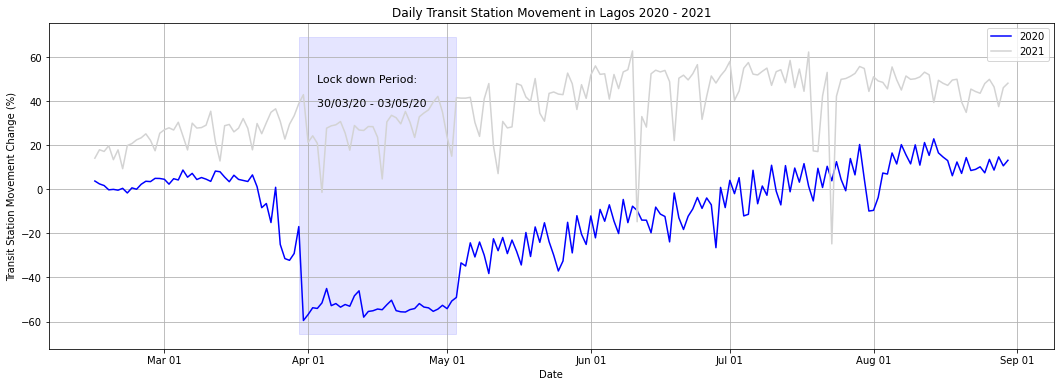

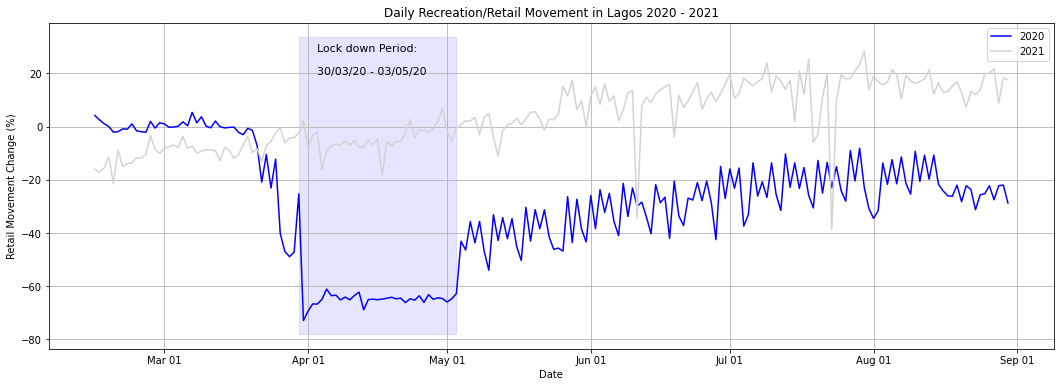

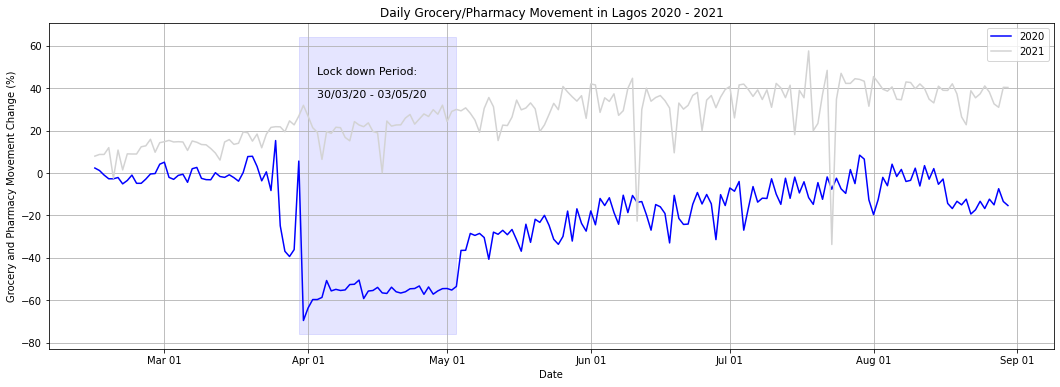

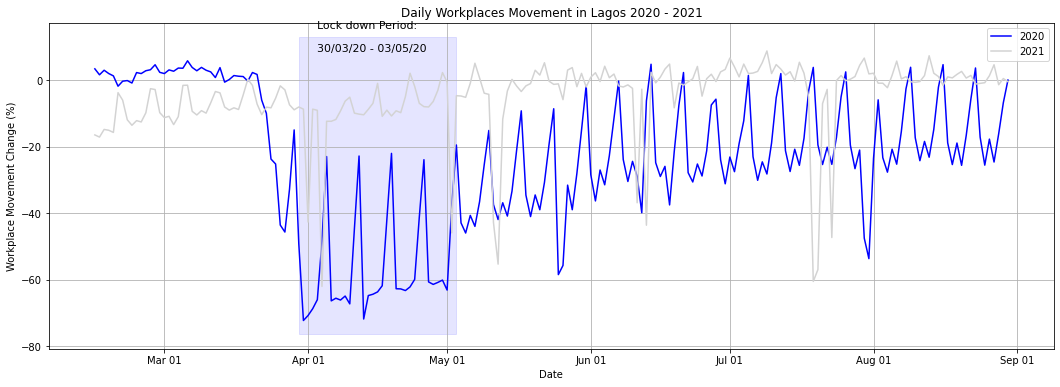

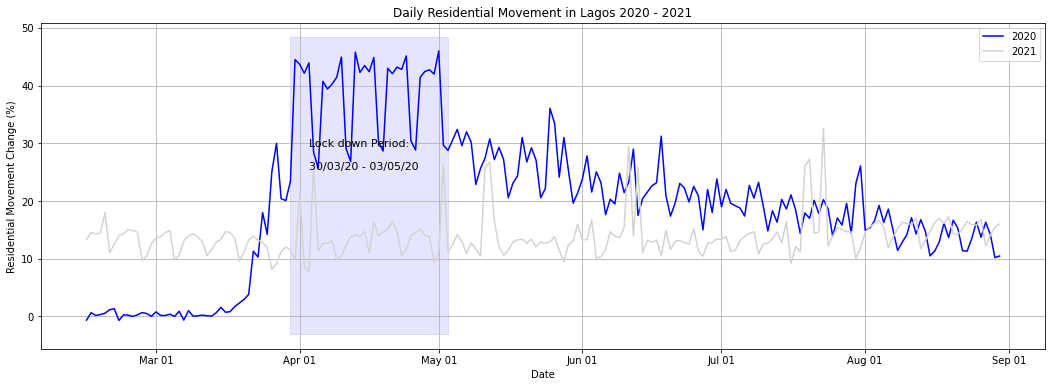

In [ ]:
# Plotting Result in a line plot.

def plot_movement_data(df, 
                     movement_type,
                     y_label,
                     x_label = 'Date',
                     title = 'Daily Movement in Lagos 2019 - 2021'):
    fig, ax = plt.subplots(figsize=(18, 6))

    ax.plot(df[df.index.year == 2020].index[:-1], df[df.index.year == 2020][movement_type][:-1], color='blue', label='2020')
    ax.plot(df[df.index.year == 2020].index[:-1], df[df.index.year == 2021][movement_type] ,color='#D3D3D3', label='2021')

    ax.fill_between(x = [pd.to_datetime('2020-03-30'), pd.to_datetime('2020-05-03')],
                    y1= ax.get_ylim()[0],
                    y2= ax.get_ylim()[1],
                    # transform=ax.get_xaxis_transform(),
                    color="blue", 
                    alpha=0.1)
    
    ax.text(pd.to_datetime('2020-04-03'),
            ax.get_ylim()[1]* (0.5), 
            'Lock down Period: \n\n30/03/20 - 03/05/20',
            fontsize=11)


    ax.set_title(title)
    ax.grid()
    ax.legend()
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

    ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
    plt.show()

# plot graphh of the respextive air quality
plot_movement_data(lagos_mobility,
                 y_label= 'Transit Station Movement Change (%)',
                 movement_type = 'transit_stations_percent_change_from_baseline', 
                 title = 'Daily Transit Station Movement in Lagos 2020 - 2021')

plot_movement_data(lagos_mobility,
                 y_label = 'Retail Movement Change (%)',
                 movement_type ='retail_and_recreation_percent_change_from_baseline', 
                 title = 'Daily Recreation/Retail Movement in Lagos 2020 - 2021')

plot_movement_data(lagos_mobility,
                 y_label = 'Grocery and Pharmacy Movement Change (%)',
                 movement_type = 'grocery_and_pharmacy_percent_change_from_baseline', 
                 title = 'Daily Grocery/Pharmacy Movement in Lagos 2020 - 2021')

plot_movement_data(lagos_mobility,
                 y_label = 'Workplace Movement Change (%)',
                 movement_type= 'workplaces_percent_change_from_baseline', 
                 title = 'Daily Workplaces Movement in Lagos 2020 - 2021')

plot_movement_data(lagos_mobility,
                 y_label = 'Residential Movement Change (%)',
                 movement_type = 'residential_percent_change_from_baseline', 
                 title = 'Daily Residential Movement in Lagos 2020 - 2021')


# Plot Air Passenger

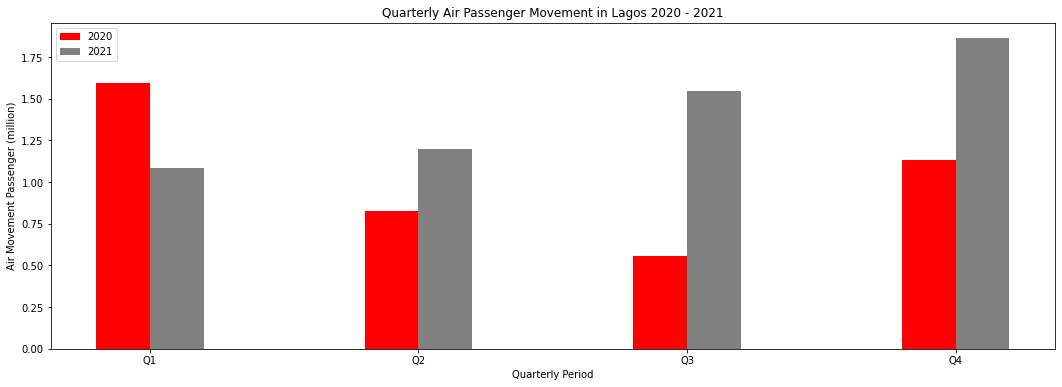

In [ ]:
# Plotting Air Passenger in a bar plot.

def plot_air_passenger(df, col_name, 
                       x_label,
                       y_label,
                       title = 'Passenger'):
    fig, ax = plt.subplots(figsize=(18, 6))

    labels = ['Q1', 'Q2', 'Q3', 'Q4']
  

    y_2021 = df[df.Year==2021][col_name] 
    y_2020 = df[df.Year==2020][col_name]

    if col_name in ['Passenger', 'Gdp_value'] :
      y_2021 = y_2021 * (10**-6)
      y_2020 = y_2020 * (10**-6)


    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    rect_2020 = ax.bar(x - width/2, y_2020, width, color='red', label='2020')
    rect_2021 = ax.bar(x + width/2, y_2021, width, color='grey', label='2021')

    # 
    for bar in rect_2020.patches:
      if bar.get_height() == 829104:
         ax.annotate("Lockdown Period", xy=(bar.get_xy()[0] + bar.get_width() / 2,bar.get_height()+470000 ),
                      xycoords='data',
                      xytext=(0.8, 0.95),
                      arrowprops=dict(facecolor='black',shrink=0.05),
                      size=15,
                      horizontalalignment='right',
                      verticalalignment='top',
                      textcoords='offset points')
    
        
    # print(rect_2020.get_x())

    ax.set_ylabel(y_label)
    ax.set_xlabel( x_label)

    # ax.bar_label(rect_2020, padding=3)
    # ax.bar_label(rect_2021, padding=3)


    ax.set_xticks(x, labels)
    ax.set_title(title)
    ax.legend()
    plt.show()

    fig.tight_layout()

# plot graphh of the respextive air quality
plot_air_passenger(Lagos_air_passenger,
                 'Passenger', 
                 y_label= 'Air Movement Passenger (million)',
                 x_label = 'Quarterly Period',
                 title = 'Quarterly Air Passenger Movement in Lagos 2020 - 2021')

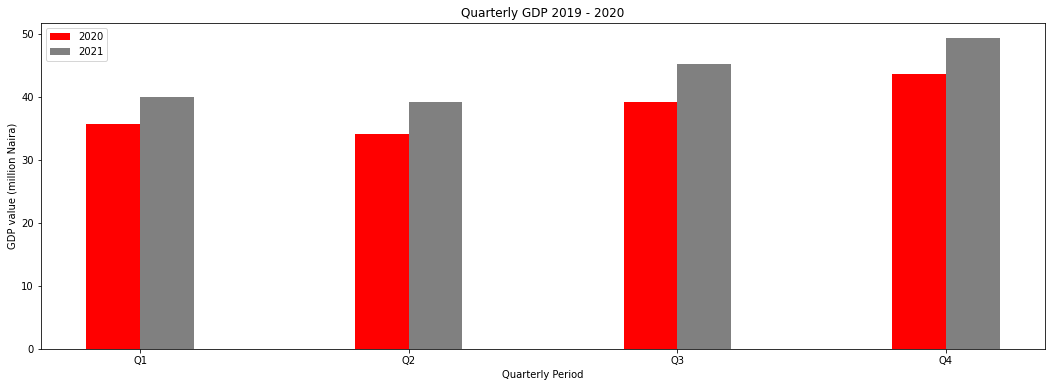

In [ ]:
Gdp_quartely = Gdp_data_value_new.groupby(['Quarterly Year']).sum().reset_index()
Gdp_quartely['date'] = Gdp_quartely['Quarterly Year'].str.split(expand=True)[1] + Gdp_quartely['Quarterly Year'].str.split(expand=True)[0]

Gdp_quartely['date'] = pd.to_datetime(Gdp_quartely['date']).dt.to_period('Q')

Lagos_air_passenger = pd.merge(Lagos_air_passenger, Gdp_quartely[['date', 'Gdp_value']], how='left', left_on= 'date', right_on= 'date')

# plot the GDP value
plot_air_passenger(Lagos_air_passenger, 
                col_name= 'Gdp_value', 
                 x_label = 'Quarterly Period',
                 y_label = 'GDP value (million Naira)',
                 title = 'Quarterly GDP 2019 - 2020')

In [ ]:
industry_list = Gdp_data_growth[(Gdp_data_growth['Industry'].str.split('.', expand=True)[0].str.len() > 2)]['Industry'].to_list()

# Plot Change in GDP

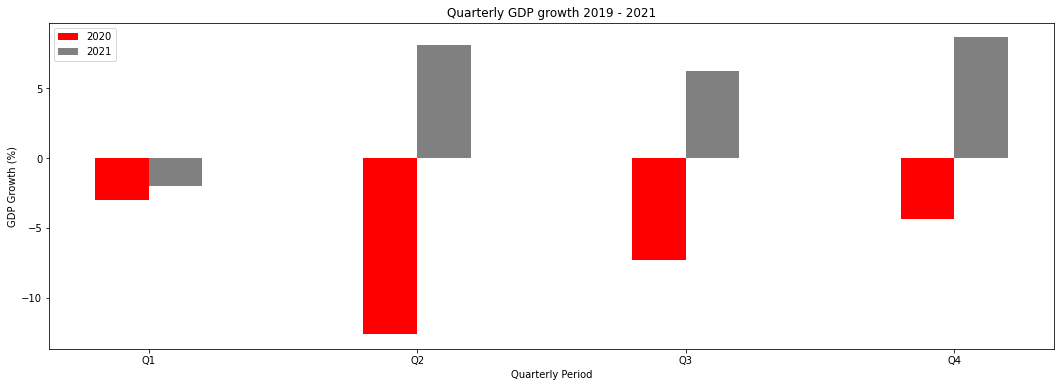

In [ ]:
Gdp_quartely = Gdp_data_growth_new[~(Gdp_data_growth_new['Industry'].isin(industry_list))].groupby(['Quarterly Year']).mean().reset_index()
Gdp_quartely['date'] = Gdp_quartely['Quarterly Year'].str.split(expand=True)[1] + Gdp_quartely['Quarterly Year'].str.split(expand=True)[0]
Gdp_quartely['date'] = pd.to_datetime(Gdp_quartely['date']).dt.to_period('Q')
Lagos_air_passenger = pd.merge(Lagos_air_passenger, Gdp_quartely[['date', 'Gdp_growth']], how='left', left_on= 'date', suffixes = ('', '_y'),right_on= 'date')

plot_air_passenger(Lagos_air_passenger, 
                 'Gdp_growth', 
                 x_label = 'Quarterly Period',
                 y_label = 'GDP Growth (%)',
                 title = 'Quarterly GDP growth 2019 - 2021')

# Export Daily Mobilty Data of Lagos

```
# For analysis and correlation with environmental Data
```



In [ ]:
# lagos_mobility.groupby(pd.Grouper(freq='7D')).mean()
date_range_2020 = pd.date_range(start='1/1/2020', end='31/8/2020')

real_range_df = pd.DataFrame(index= date_range_2020)

pd.merge(real_range_df, lagos_mobility, 
         left_index=True, 
        right_index=True, 
        how='left').dropna(subset=['retail_and_recreation_percent_change_from_baseline'])

In [ ]:
lagos_mobility['Timestamp'] =  lagos_mobility.index
file_name = os.path.join(root_dir, f'Nigeria Google Mobility Data/Lagos_DailyMobilityJanAug2020_2021')
lagos_mobility.to_csv(file_name, index=False)